In this step we will be importing the lobraries needed and 

In [102]:
import mne
import os 
import numpy as np
from mne.io import read_raw_edf
from mne.preprocessing import ICA, create_eog_epochs
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

Extracting EDF parameters from c:\Users\jlriv\Downloads\GitHub Projects\EEG Research\DashaX_NeuroSpeak\software\data_cleaning\Imagined_speech_EEG_edf\Char\name0_A.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1535  =      0.000 ...    11.992 secs...


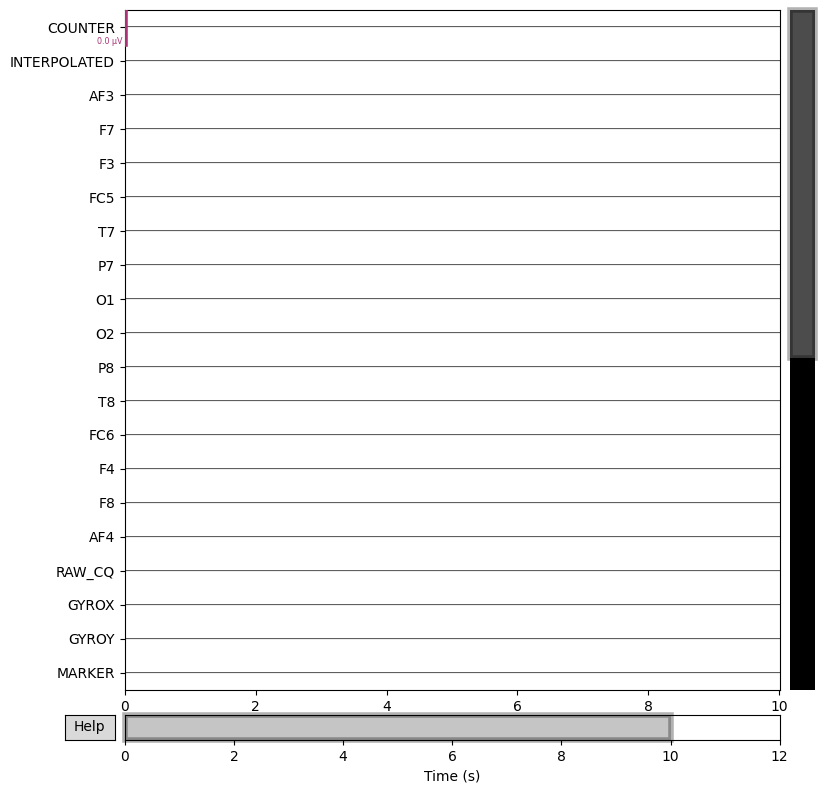

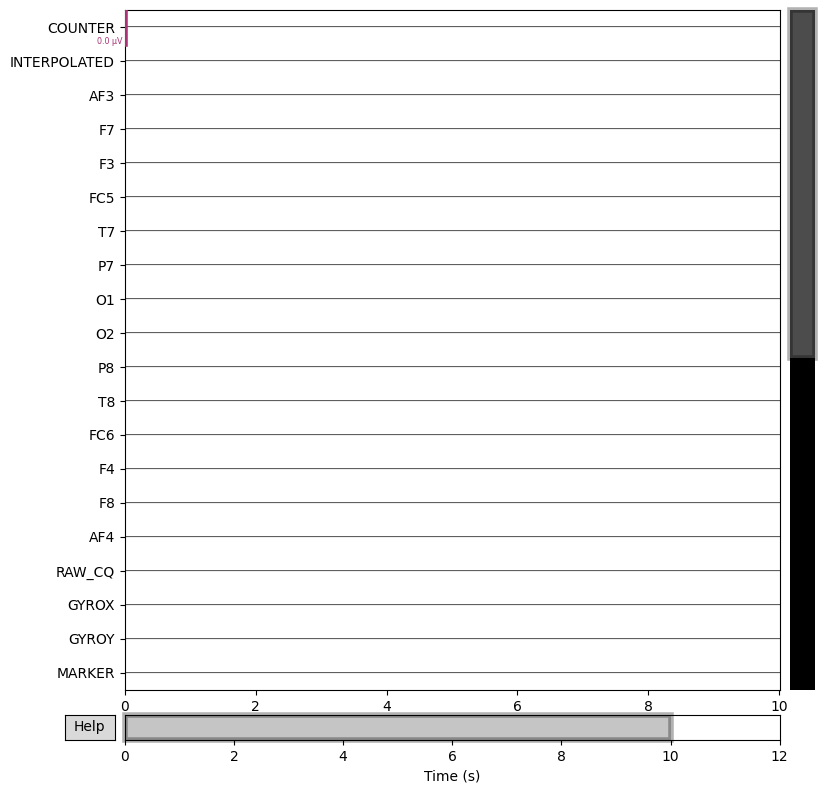

In [103]:
DATASET_CHAR = '../data_cleaning/Imagined_speech_EEG_edf/Char/name0_A.edf'
raw = read_raw_edf(DATASET_CHAR, preload=True)
raw.plot(scalings='auto')

In [104]:
raw.ch_names

['COUNTER',
 'INTERPOLATED',
 'AF3',
 'F7',
 'F3',
 'FC5',
 'T7',
 'P7',
 'O1',
 'O2',
 'P8',
 'T8',
 'FC6',
 'F4',
 'F8',
 'AF4',
 'RAW_CQ',
 'GYROX',
 'GYROY',
 'MARKER',
 'SYNC',
 'TIME_STAMP_s',
 'TIME_STAMP_ms',
 'CQ_AF3',
 'CQ_F7',
 'CQ_F3',
 'CQ_FC5',
 'CQ_T7',
 'CQ_P7',
 'CQ_O1',
 'CQ_O2',
 'CQ_P8',
 'CQ_T8',
 'CQ_FC6',
 'CQ_F4',
 'CQ_F8',
 'CQ_AF4',
 'CQ_CMS',
 'CQ_DRL']

In [105]:
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: COUNTER, INTERPOLATED, AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, ...
 chs: 39 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: 2017-02-25 19:41:49 UTC
 nchan: 39
 projs: []
 sfreq: 128.0 Hz
 subject_info: <subject_info | his_id: 1>
>


In [106]:
raw.pick_types(meg=False, eeg=True, eog=False, ecg=False, emg=False, ref_meg=False)
raw.set_eeg_reference(projection=True)
filteredData = raw.filter(l_freq=0, h_freq=40.0)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 43 samples (0.336 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.0s finished


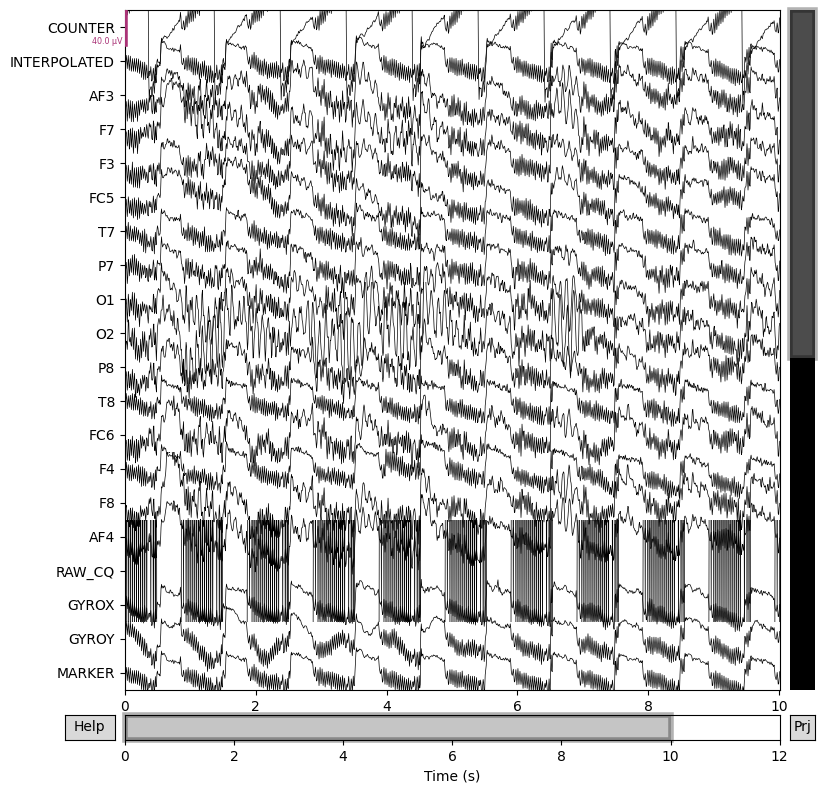

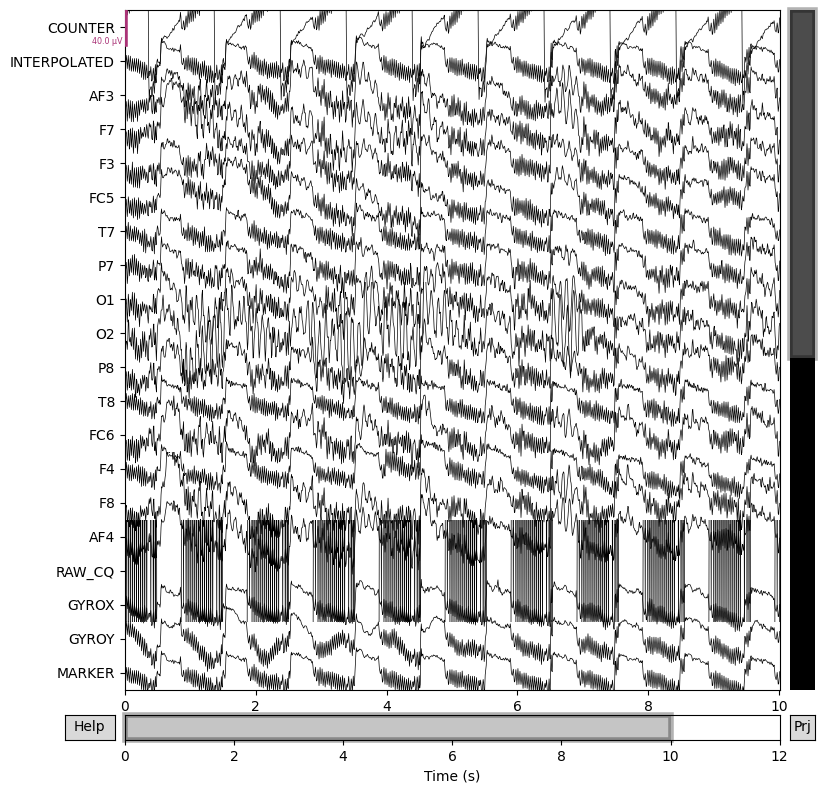

In [107]:
filteredData.plot()

In [ ]:
icaData = ICA(n_components=14, method='fastica', max_iter=10000000, random_state=42).fit(filteredData)
icaData.exclude = [0]
raw_clean = icaData.apply(filteredData.copy())
raw_clean.plot()

Fitting ICA to data using 39 channels (please be patient, this may take a while)
Selecting by number: 14 components
Computing Extended Infomax ICA


C:\Users\jlriv\AppData\Local\Temp\ipykernel_10108\3788558451.py:1: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  icaData = ICA(n_components=14, method='infomax', fit_params={'extended': True}, max_iter=1000, random_state=42).fit(filteredData)


Fitting ICA took 0.7s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 1 ICA component
    Projecting back using 39 PCA components


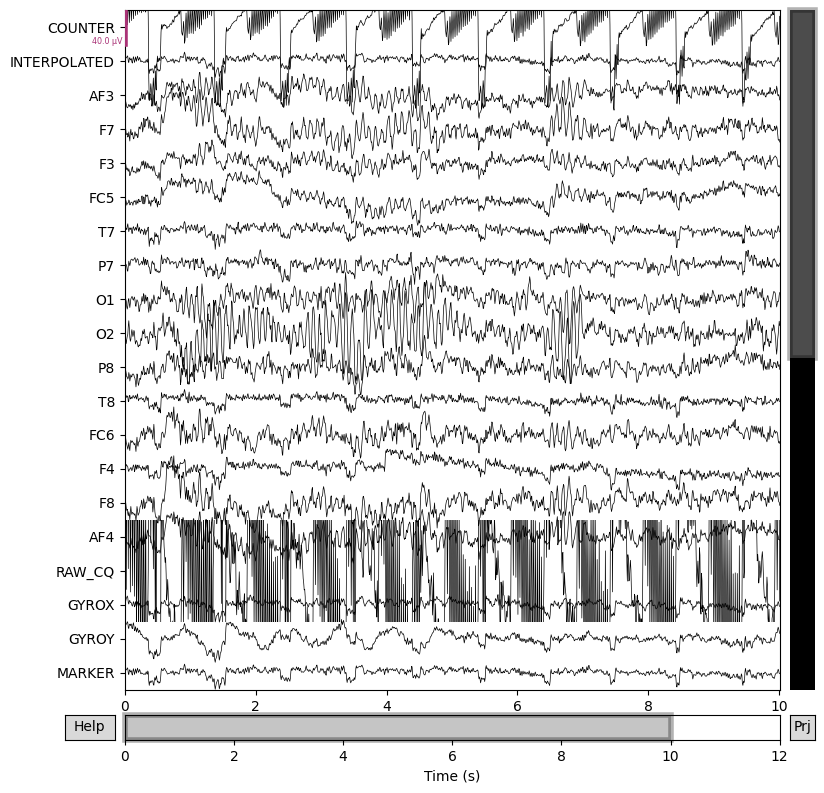

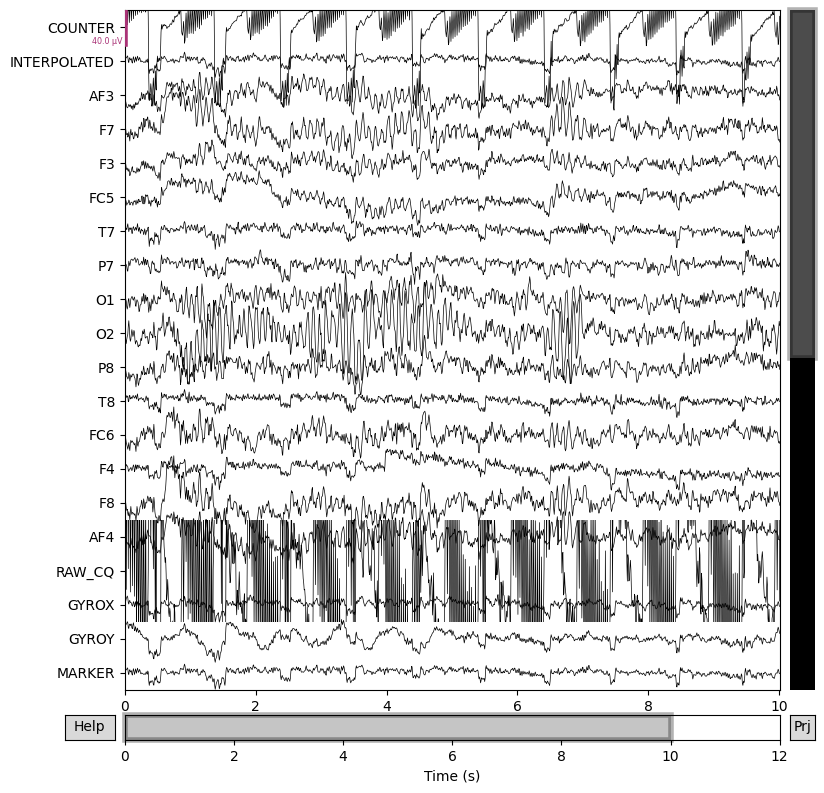

In [108]:
icaData = ICA(n_components=14, method='infomax', fit_params={'extended': True}, max_iter=1000, random_state=42).fit(filteredData)
icaData.exclude = [0]
raw_clean = icaData.apply(filteredData.copy())
raw_clean.plot()

In [109]:
#choose channel
ch_name = 'O2'
inst = filteredData.copy().pick_channels([ch_name])

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 12.000 (s)
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\jlriv\AppData\Local\Temp\ipykernel_10108\2538070400.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  inst.plot_psd(


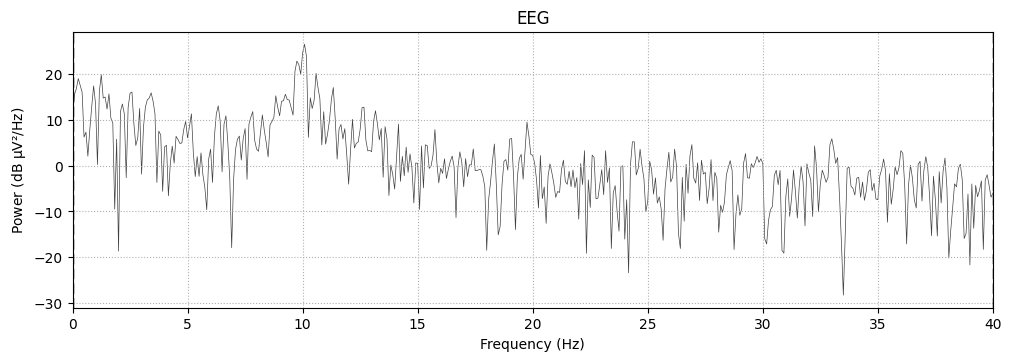

In [110]:
inst.plot_psd(
    fmin=0,
    fmax=40,
    average=False,
    dB=True,
    show=False
)

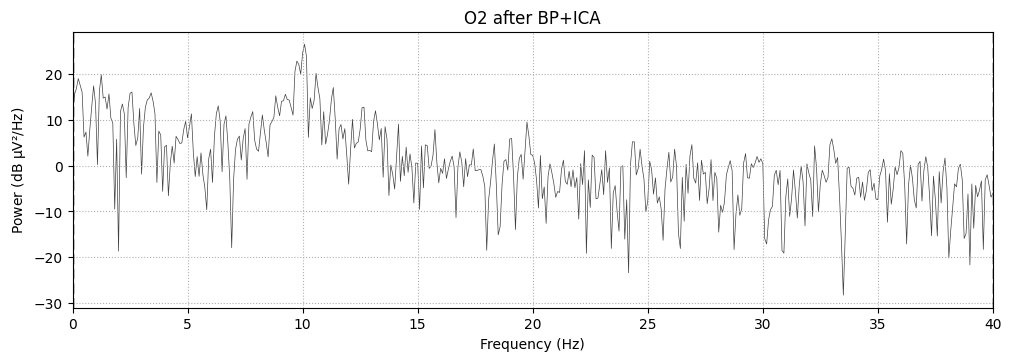

In [111]:
#just for title with current channel
plt.title(f'{ch_name} after BP+ICA')
plt.show()